In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as snsm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [3]:
os.chdir('Data2/')

# Compare Brewery Score with Values Derived from Style Categories

In [4]:
brews_df = pd.read_pickle('Clean_Brewery_Data')
style_df = pd.read_pickle('Clean_Beer_Style_Data')
style_df = pd.concat([brews_df, style_df],axis=1,join='inner')

In [5]:
style_df.drop(['Num_Beers','Beer_Score','Town','State','Country',
               'Total_Beer_Reviews','Total_Beer_Ratings',
               'Num_Brewery_Reviews','Num_Brewery_Ratings',
               'Eatery','Beer_to_go'],axis=1,inplace=True)

### Taking a look at Correlations

In [6]:
corr_style_df = style_df.corr()

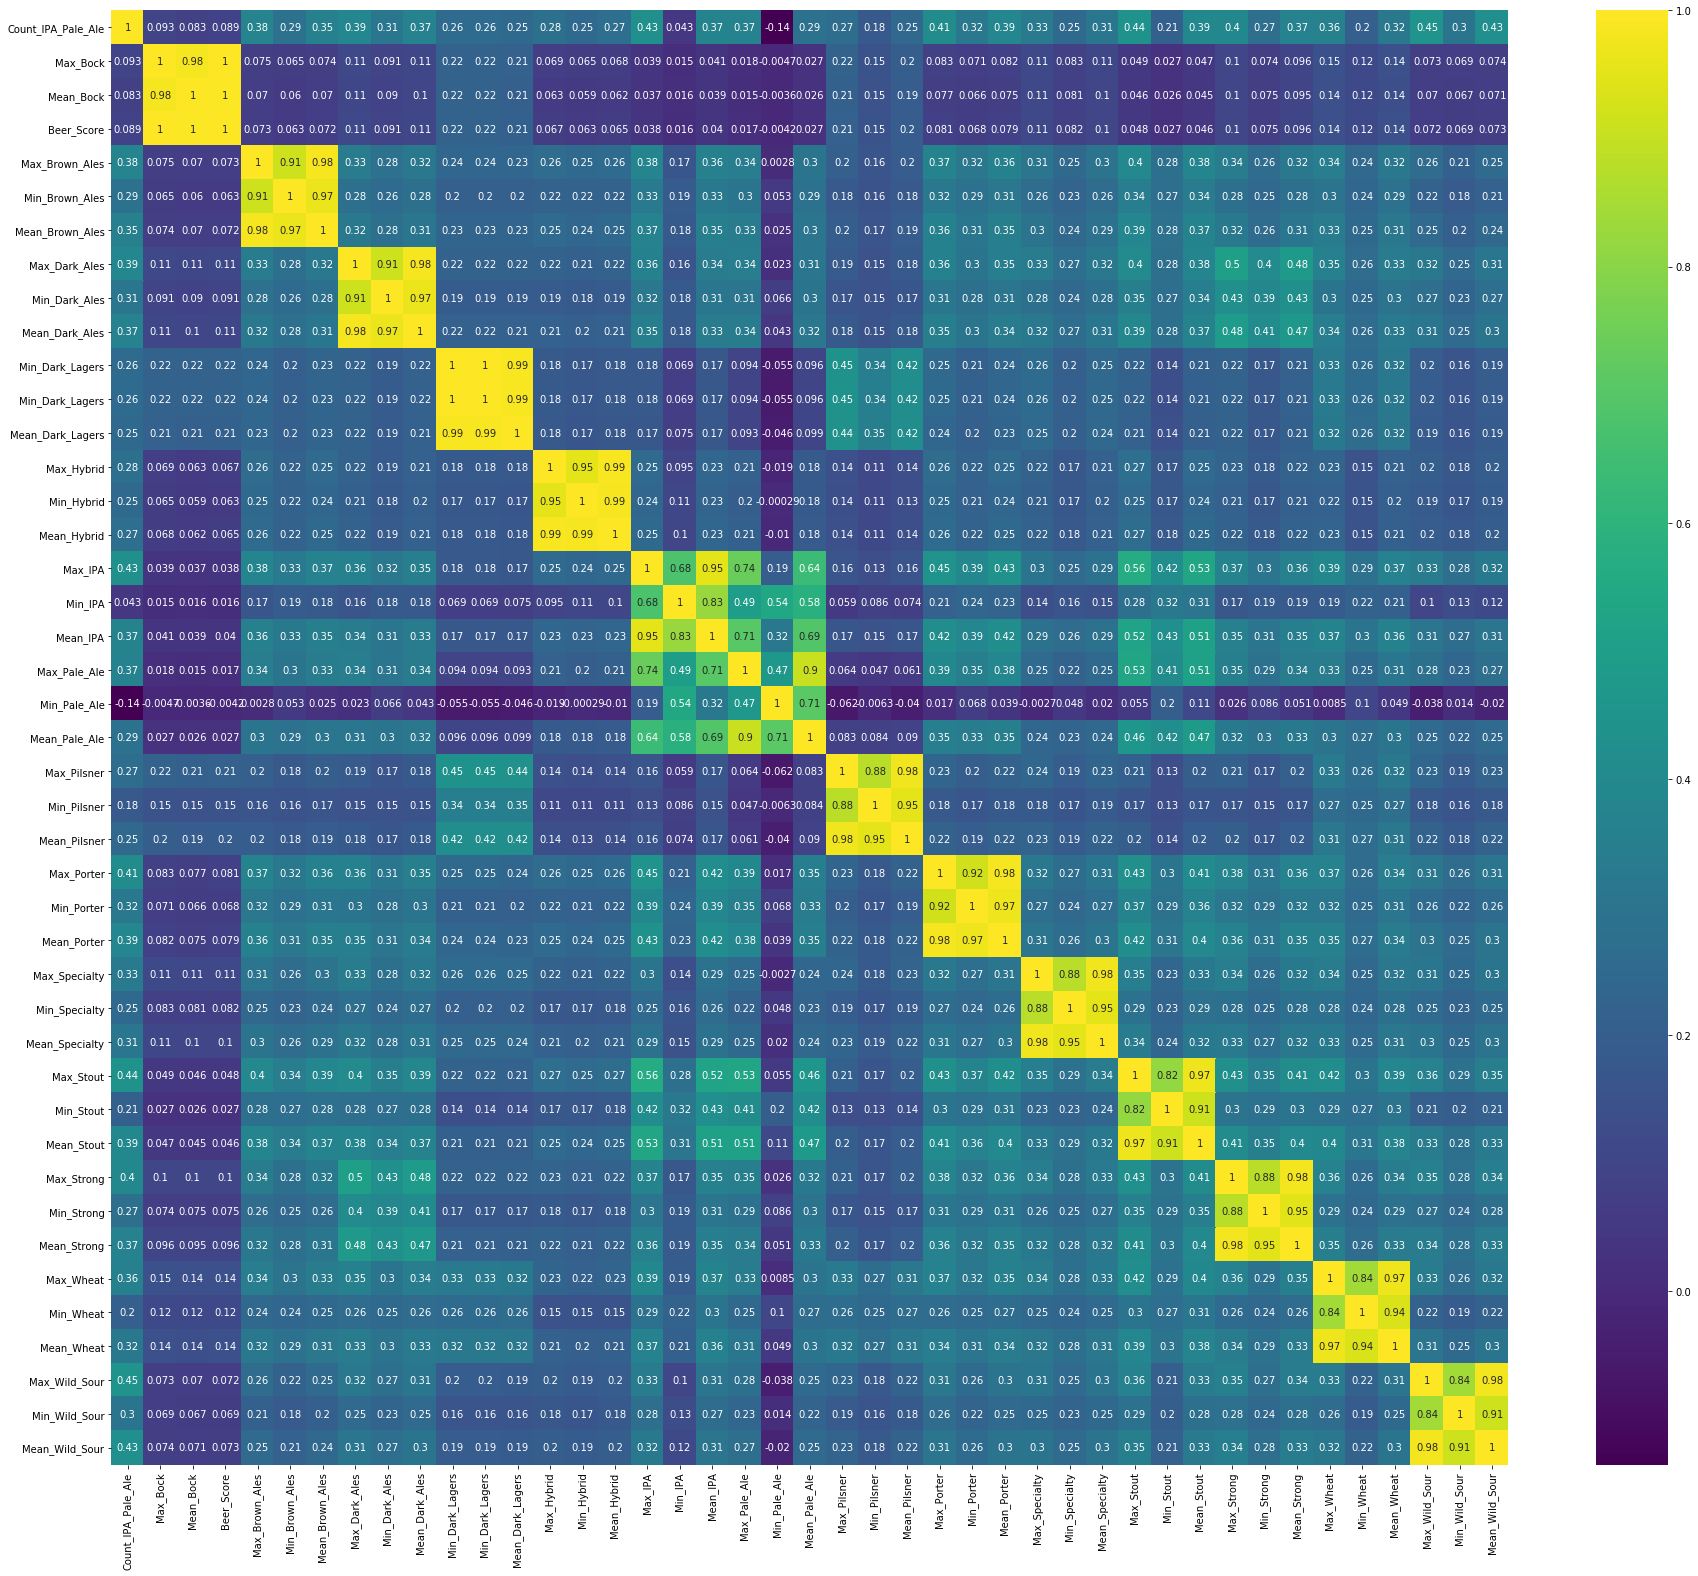

In [24]:
corr_style_df = style_df.corr()

plt.figure(figsize=(26,22))
sns.heatmap(corr_style_df,cmap='viridis',annot=True)
plt.tight_layout()

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Style Category Feature Engineering')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_Logs');

That looks a little too busy.  
Let's reduce the number of rows and columns by filtering out any values with a correlation weaker than `abs(0.1)` and take another look.

In [11]:
reduced_corr_style_df = corr_style_df[abs(corr_style_df.Brewery_Score) > .1]
reduced_corr_style_df = reduced_corr_style_df.transpose()
reduced_corr_style_df = reduced_corr_style_df[abs(corr_style_df.Brewery_Score) > .1]

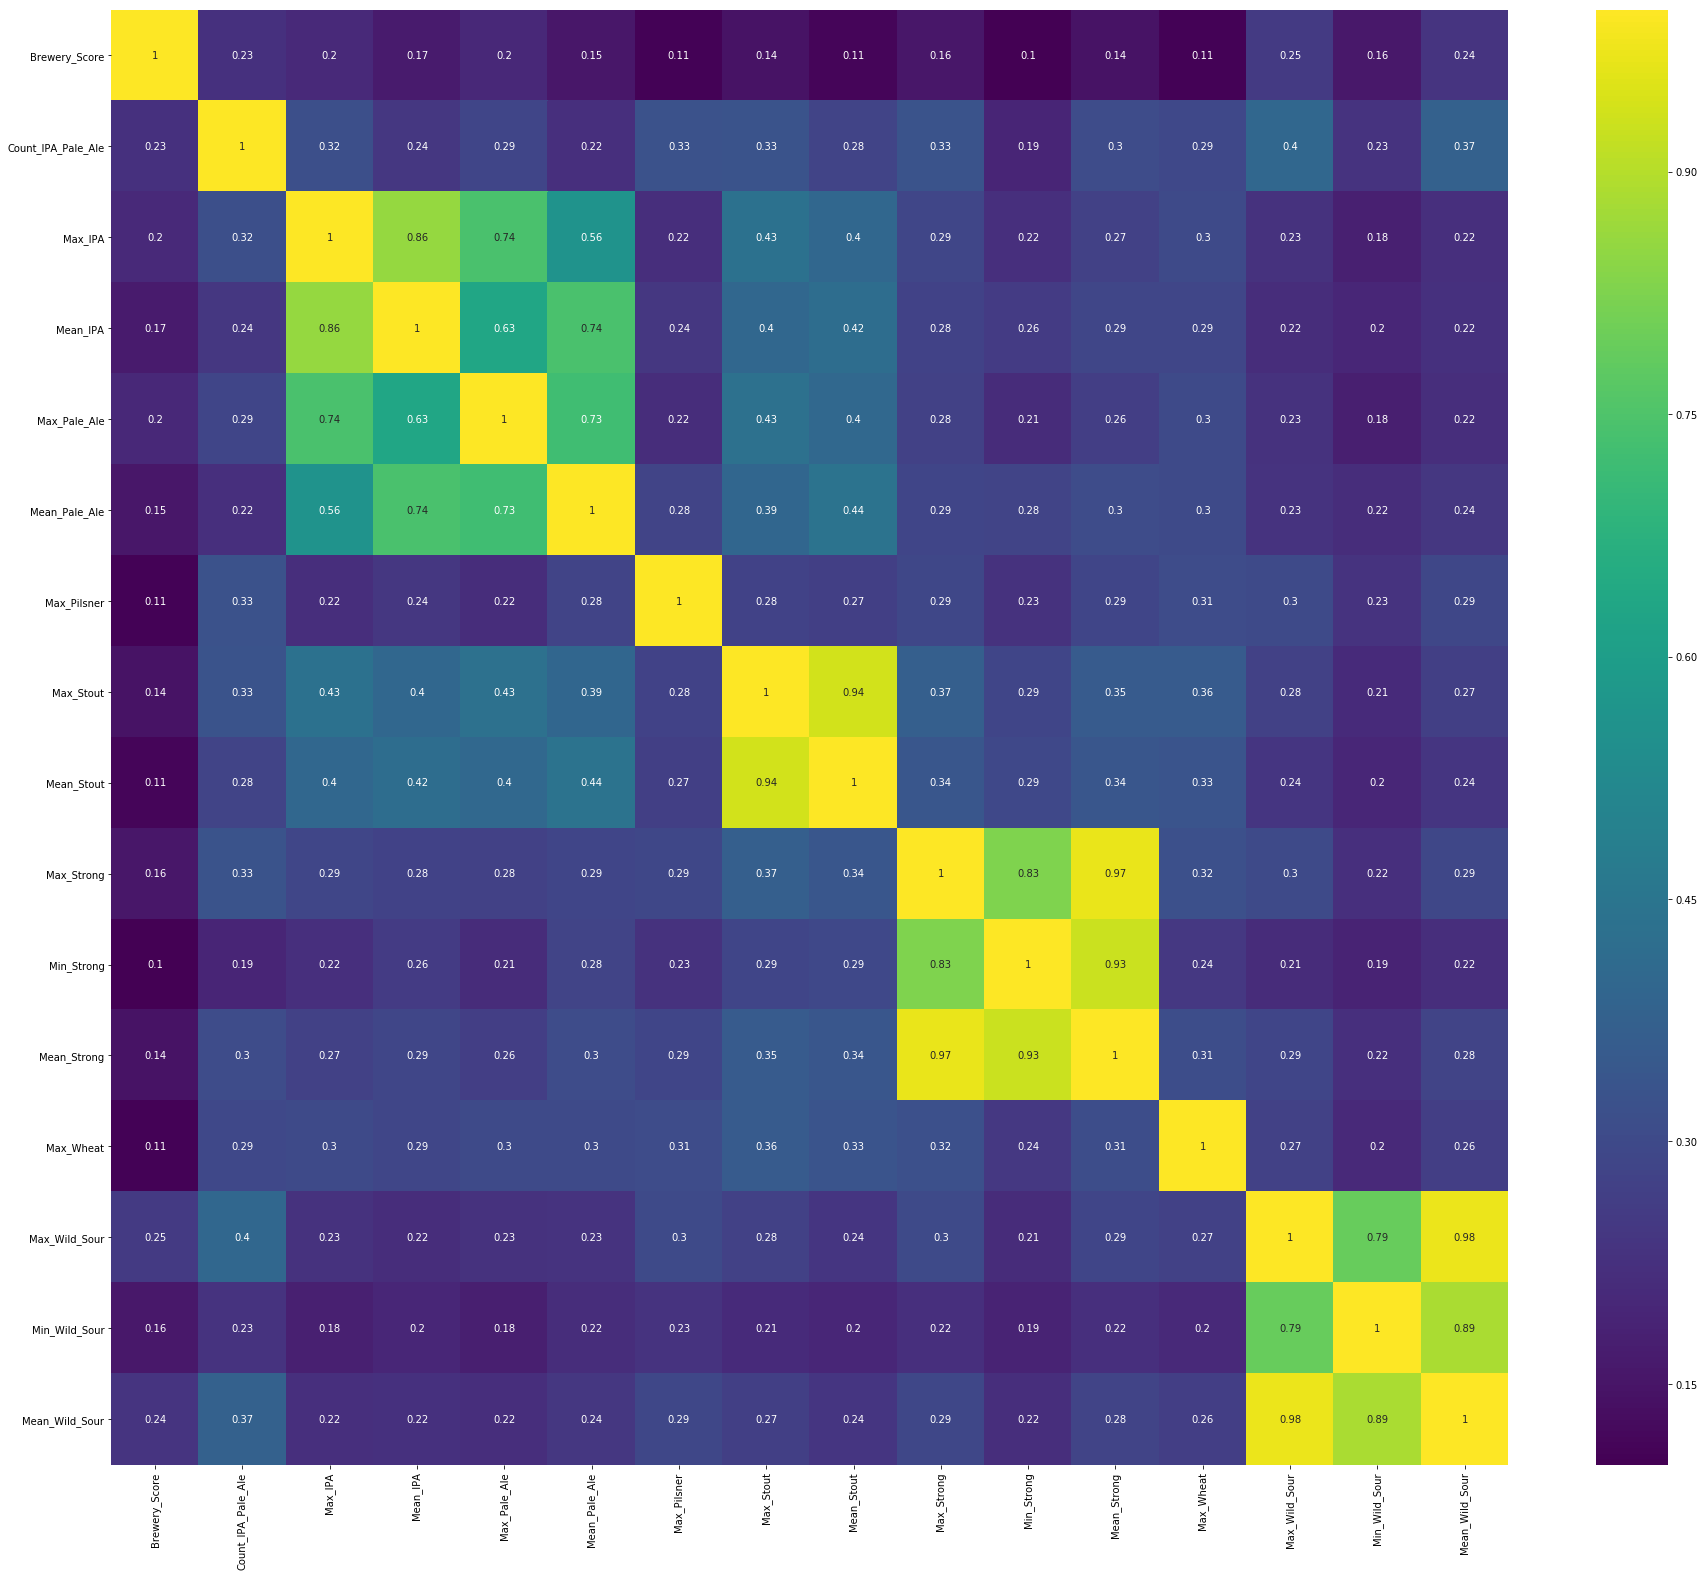

In [23]:
plt.figure(figsize=(26,22))
sns.heatmap(reduced_corr_style_df,
            cmap='viridis',annot=True)
plt.tight_layout();

### Pairplots of correlations stronger than `abs(0.2)`

### Let's reduce a bit more

In [13]:
reduced_corr_df2 = corr_style_df[abs(corr_style_df.Brewery_Score) > .2]
reduced_corr_df2 = reduced_corr_df2.transpose()
cols = list(reduced_corr_df2.columns)
reduced_df = style_df[cols]

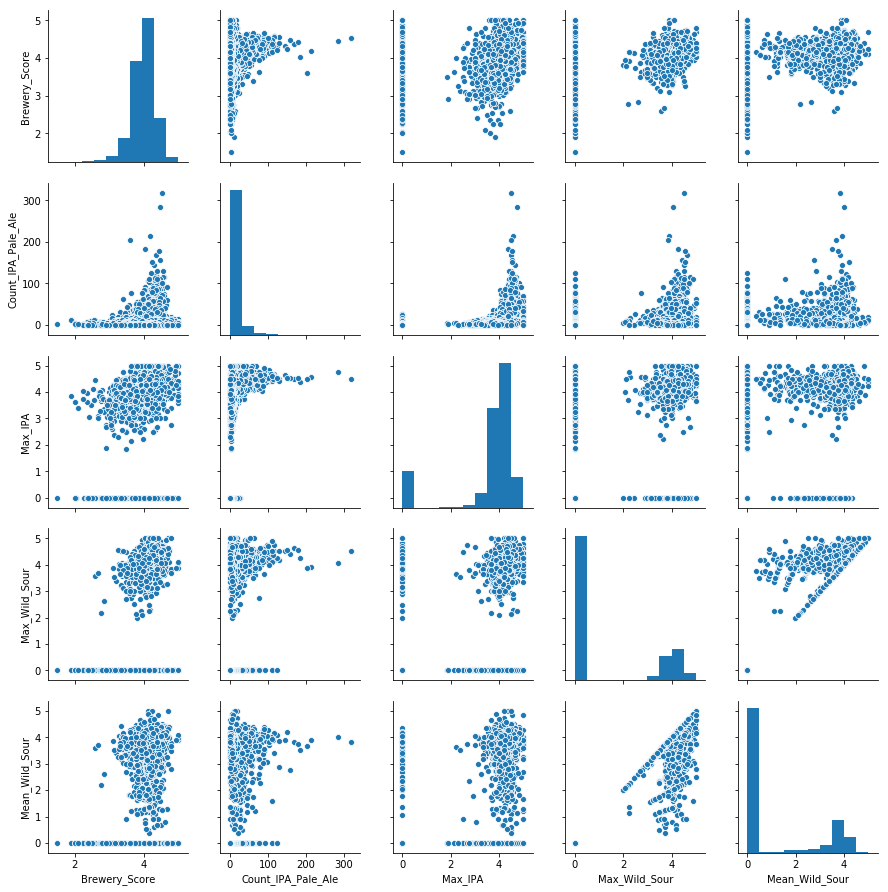

In [14]:
sns.pairplot(reduced_df);

### Visualizing without columns derived from aggregating styles info
Upon visualizing the correlations including columns derived from aggregating styles it appears that the slight correlations that existed were  perhaps more random/coincidental and not as trustworthy as would be hoped.  
Below I've plotted heatmaps and pairplots for all data not included in columns derived from aggregating styles.

In [15]:
beer_df = pd.read_pickle('Clean_Beer_Data')
beer_df.drop(['Total_Beer_Ratings'],inplace=True,axis=1)
brews_df = pd.read_pickle('Clean_Brewery_Data')
df = pd.concat([beer_df, brews_df],axis=1,join='inner')

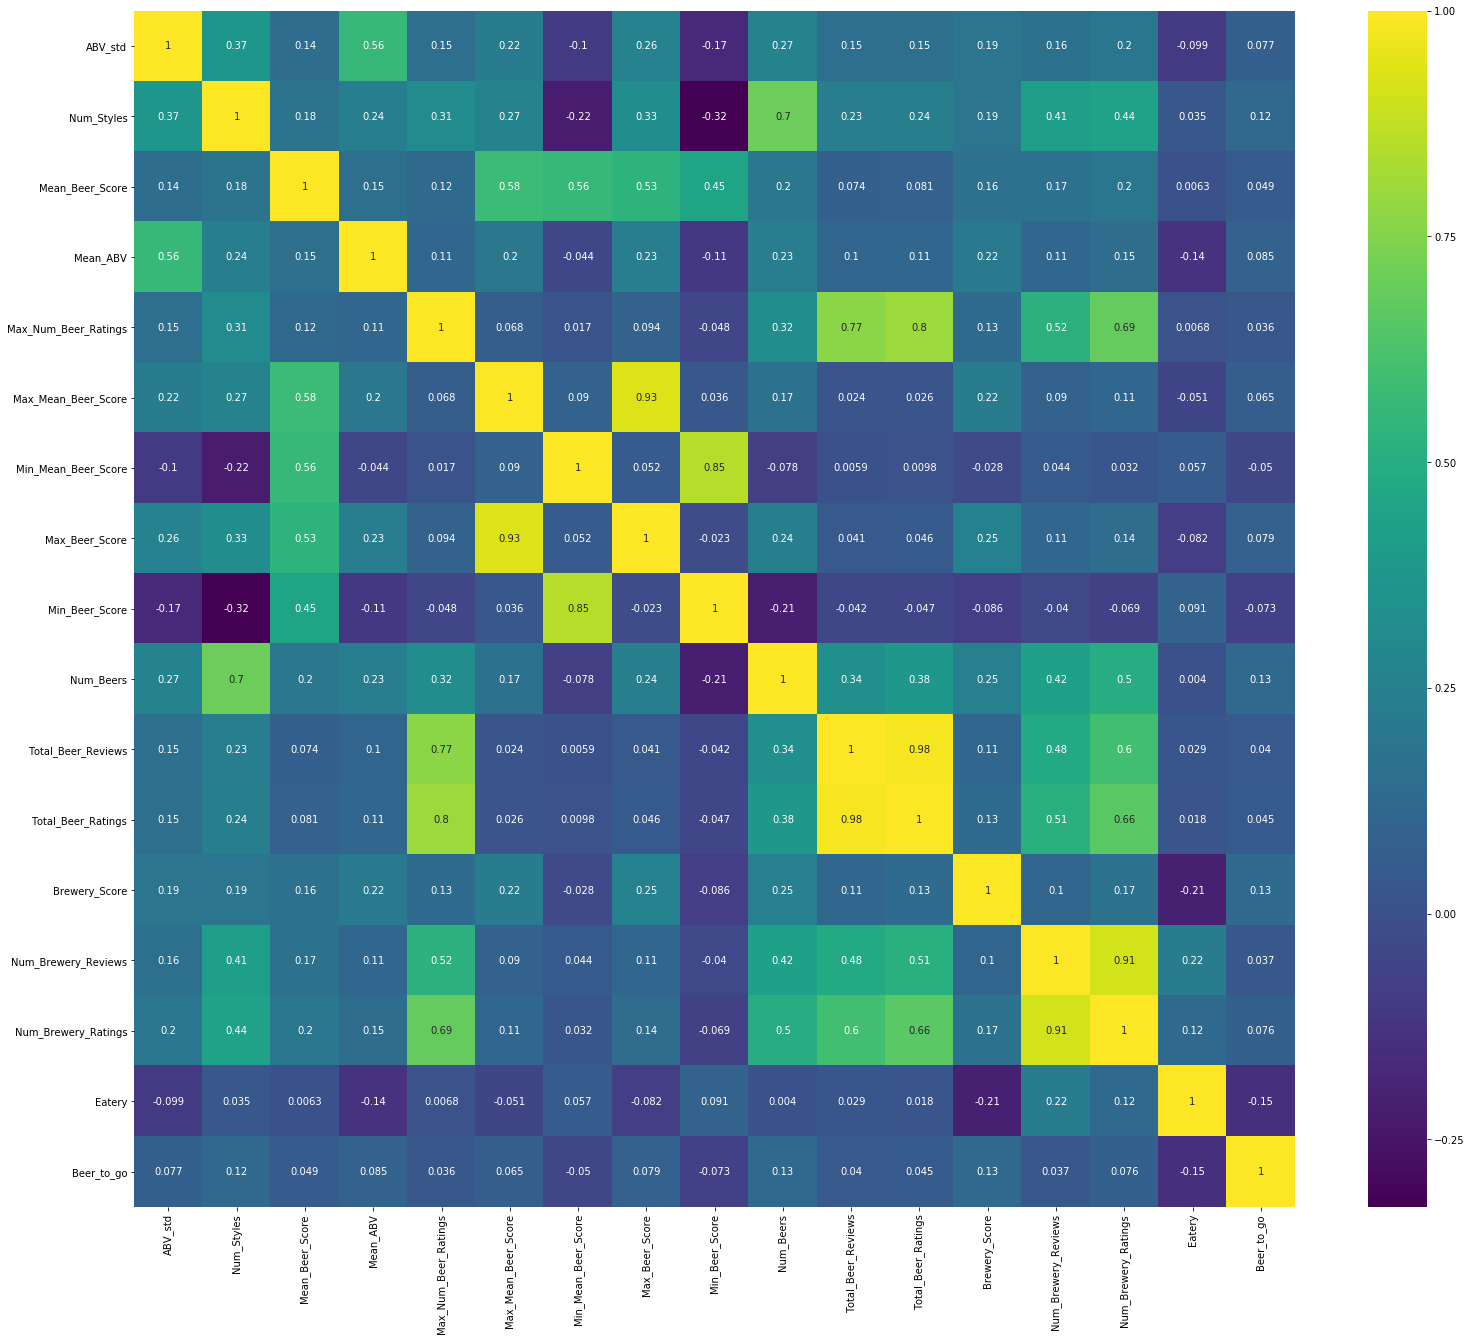

In [16]:
corr_df = df.corr()

plt.figure(figsize=(26,22))
sns.heatmap(corr_df,cmap='viridis',annot=True)
plt.tight_layout;

### Outputting some working data

In [17]:
beer_df = pd.read_pickle('Clean_Beer_Data')
beer_df.drop(['Total_Beer_Ratings'],inplace=True,axis=1)
brews_df = pd.read_pickle('Clean_Brewery_Data')
brews_df.drop(['Town','State','Country'],inplace=True,axis=1)
style_df = pd.read_pickle('Clean_Beer_Style_Data')
df = pd.concat([brews_df, style_df, beer_df],axis=1,join='inner')

pd.to_pickle(df,'All_Data')

In [18]:
df = df[['Brewery_Score','Eatery', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score']]

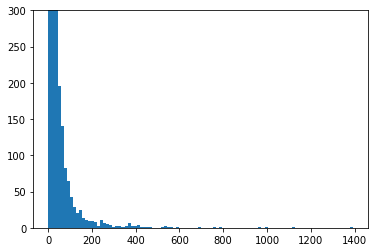

In [21]:
plt.ylim(0,300)
plt.hist(df.Num_Brewery_Ratings,bins=100);

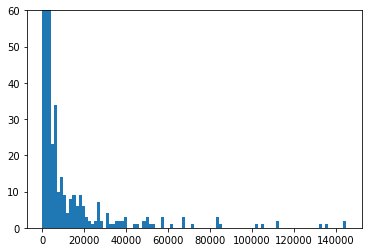

In [228]:
plt.ylim(0,60)
plt.hist(df.Total_Beer_Ratings,bins=100);

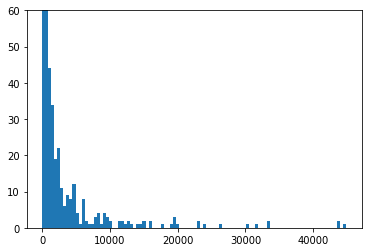

In [230]:
plt.ylim(0,60)
plt.hist(df.Total_Beer_Reviews,bins=100);

In [231]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [232]:
df.dropna(inplace=True)

In [233]:
df = df[df.Total_Beer_Reviews < 300]

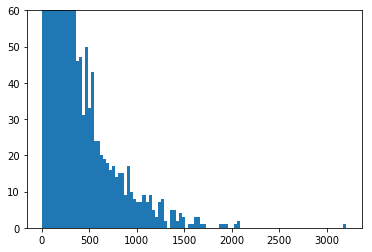

In [237]:
plt.ylim(0,60)
plt.hist(df.Num_Brewery_Ratings,bins=100);

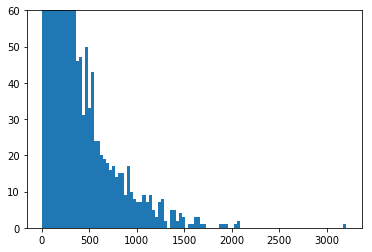

In [238]:
plt.ylim(0,60)
plt.hist(df.Total_Beer_Ratings,bins=100);

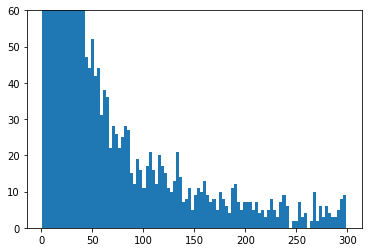

In [239]:
plt.ylim(0,60)
plt.hist(df.Total_Beer_Reviews,bins=100);

In [236]:
df.Total_Beer_Ratings.max()

3207.0

In [235]:
df['Log_Total_Beer_Reviews'] = np.log(df.Total_Beer_Ratings)

In [215]:
df = df[['Brewery_Score','Eatery', 'Log_Total_Beer_Reviews', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score']]

<Figure size 1296x1296 with 0 Axes>

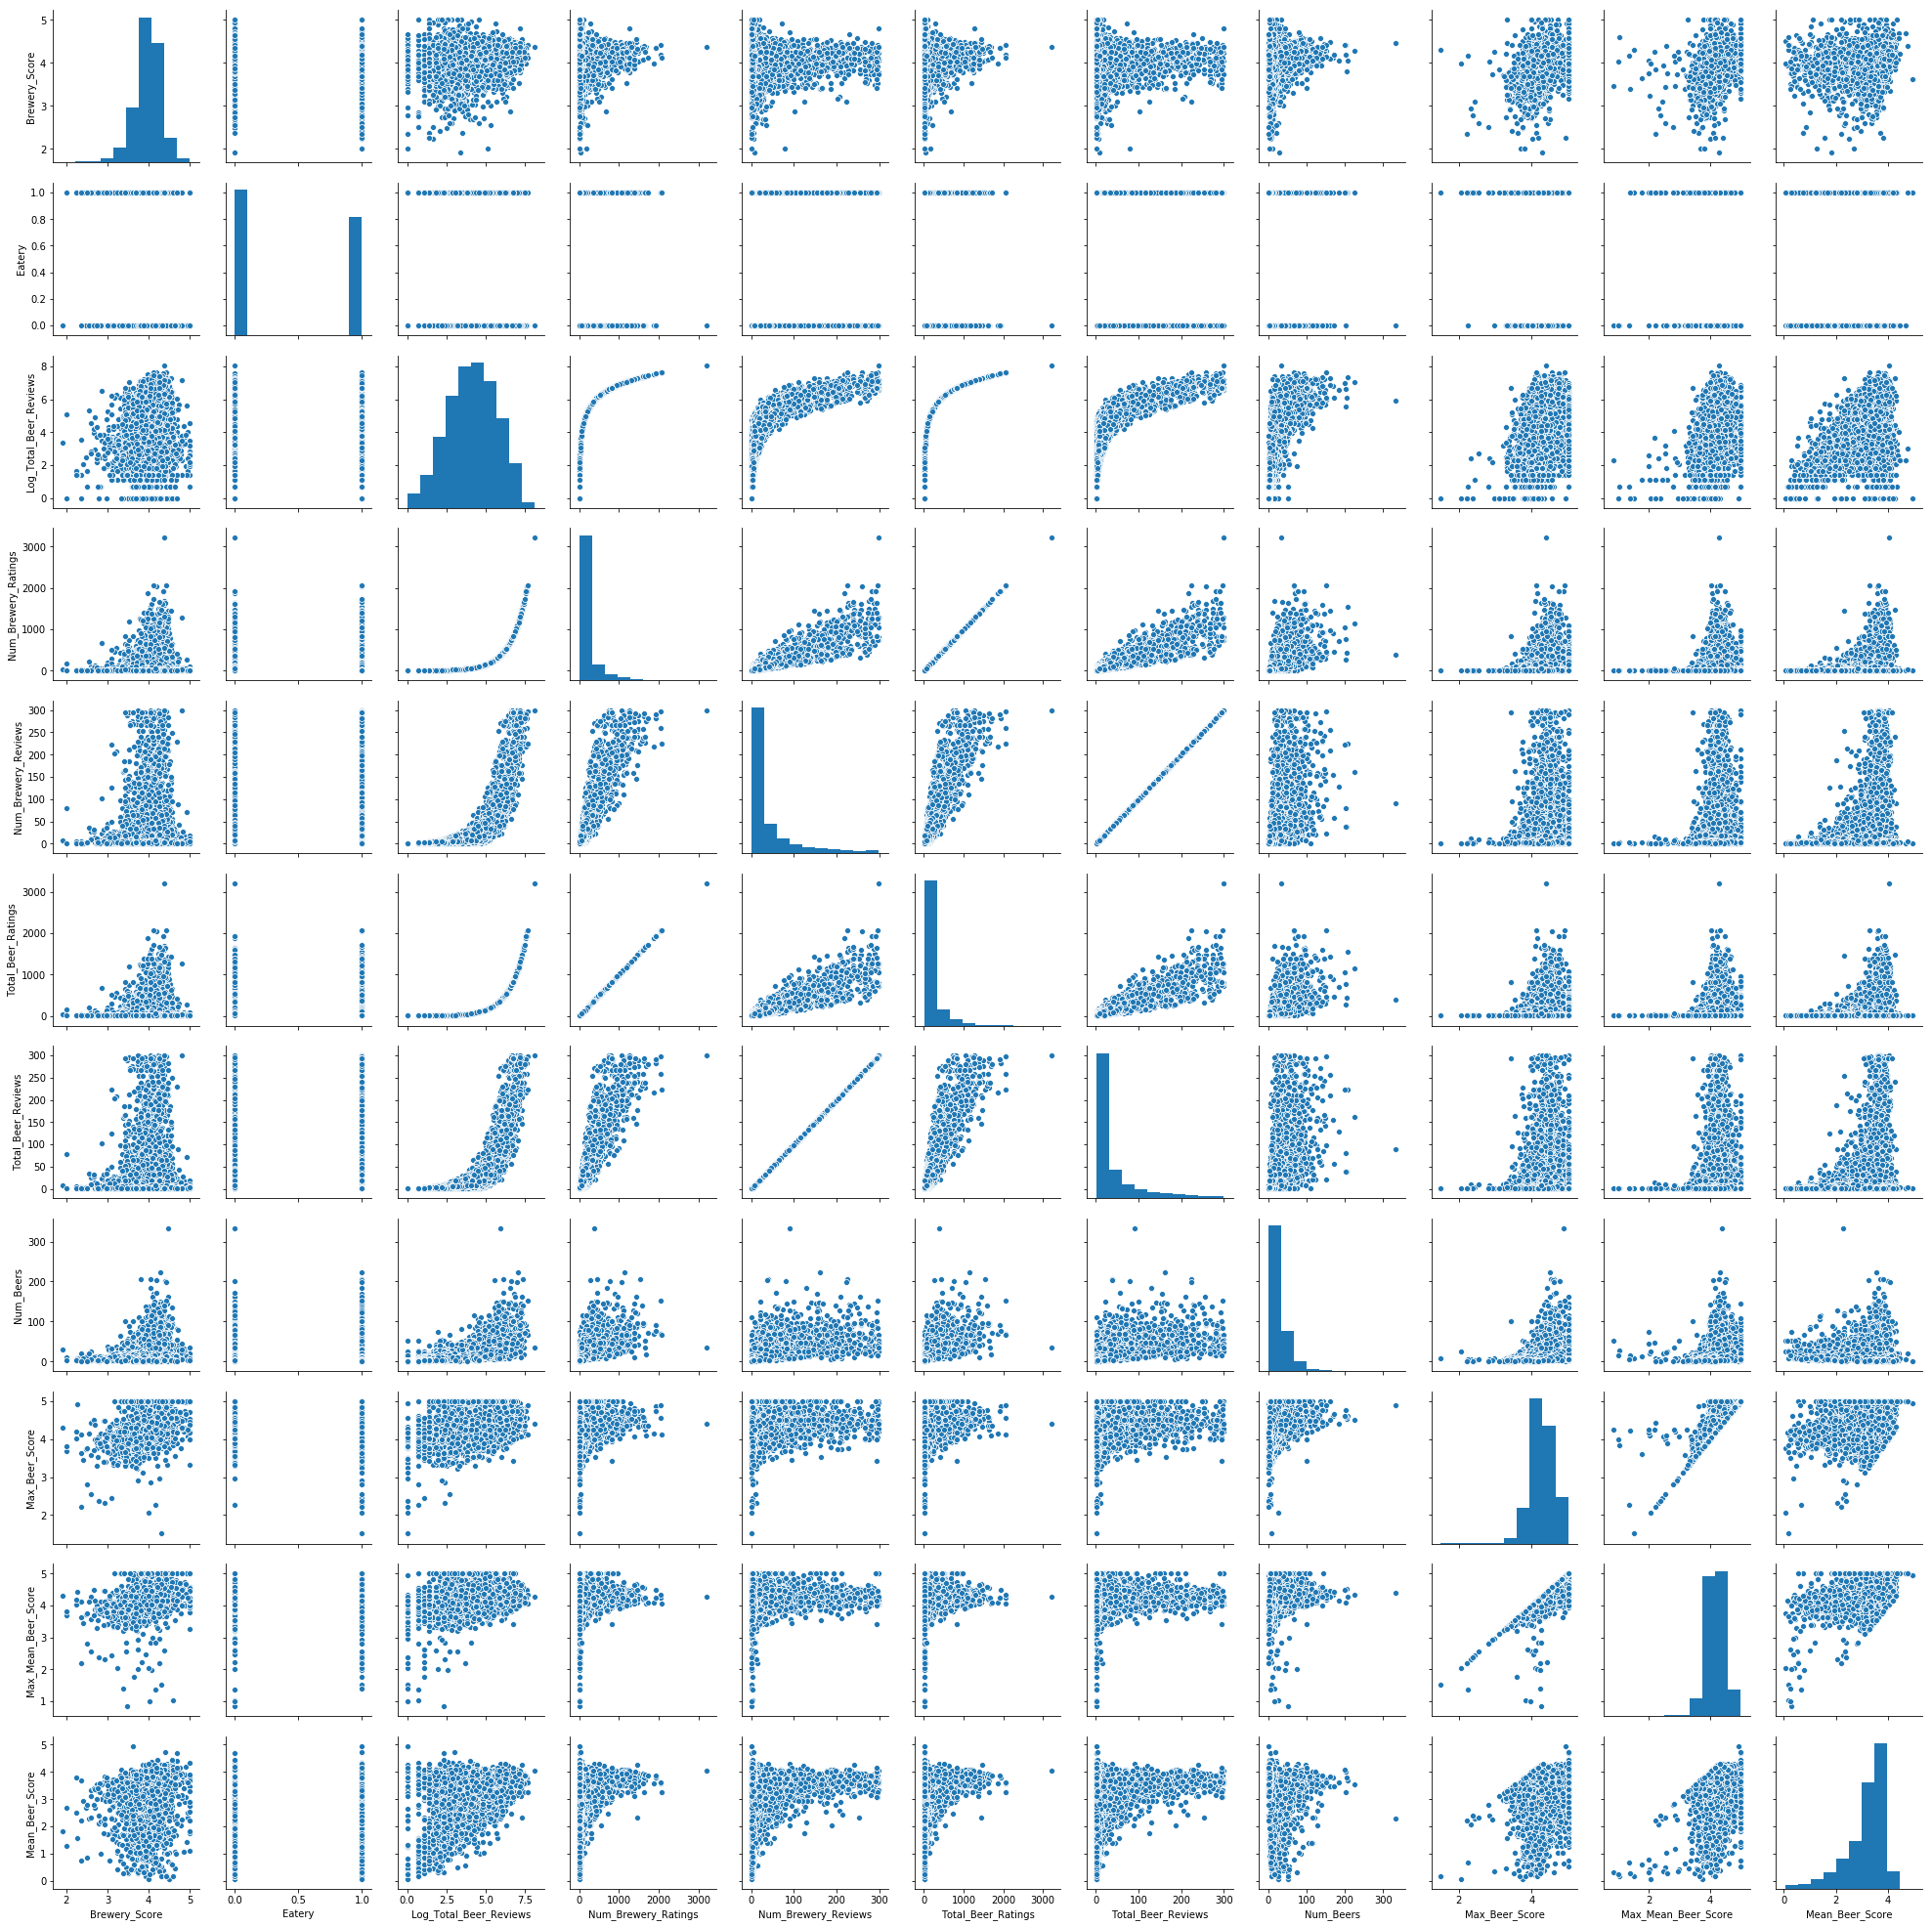

In [216]:
plt.figure(figsize=(18,18))
sns.pairplot(df);